In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train_full=x_train_full.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)


In [6]:
x_train_n=x_train_full/255.0
x_test_n=x_test/255.0

In [7]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32 , kernel_size=(3,3) , strides=1 , padding="valid" , activation="relu" , input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))                      
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

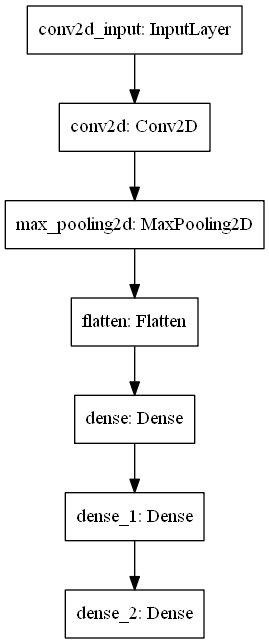

In [11]:
import pydot
keras.utils.plot_model(model)

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
model_history=model.fit(x_train,y_train,epochs=10,
                        validation_data=(x_valid,y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 62s 1ms/sample - loss: 0.7310 - accuracy: 0.7422 - val_loss: 0.5108 - val_accuracy: 0.8154
Epoch 2/10
55000/55000 [==============================] - 65s 1ms/sample - loss: 0.4809 - accuracy: 0.8261 - val_loss: 0.4559 - val_accuracy: 0.8378
Epoch 3/10
55000/55000 [==============================] - 64s 1ms/sample - loss: 0.4230 - accuracy: 0.8491 - val_loss: 0.4050 - val_accuracy: 0.8548
Epoch 4/10
55000/55000 [==============================] - 64s 1ms/sample - loss: 0.3869 - accuracy: 0.8606 - val_loss: 0.3643 - val_accuracy: 0.8730
Epoch 5/10
55000/55000 [==============================] - 64s 1ms/sample - loss: 0.3585 - accuracy: 0.8706 - val_loss: 0.3715 - val_accuracy: 0.8670
Epoch 6/10
55000/55000 [==============================] - 63s 1ms/sample - loss: 0.3359 - accuracy: 0.8792 - val_loss: 0.3381 - val_accuracy: 0.8854
Epoch 7/10
55000/55000 [==============================] -

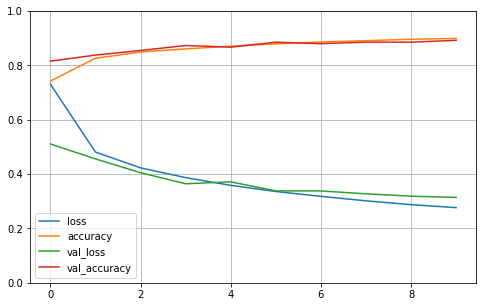

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3263531379342079, 0.8826]

In [17]:
x_new=x_test[:3]

In [18]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [19]:
y_pred=model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [20]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


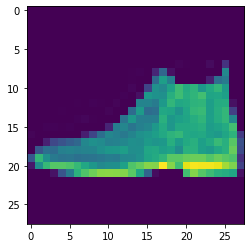

In [25]:
print(plt.imshow(x_test[0].reshape((28,28))))